# Census Income Project:

# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [2]:
#READ THE DATASET

df=pd.read_csv('C:/Users/HP/Desktop/data sets/censusincome.csv')
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


- we can see in this dataset our aim is to predict the  income of the population ,which is greater than 50k or less than 50k.The target varibale of this data is 'income' column,which have two type of values,which are <=50K and >50K.Thus this is a classification model with two types of classes,we will use different classification models to predict the incom status.
- Categorical attributes are:-
- workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: (categorical) Female, Male.
- native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- Continuous Attributes are:
- age: continuous.
- education-num: number of education year, continuous.(Individual's year of receiving education).
- fnlwgt: final weight, continuous.(The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.)
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.(Individual's working hour per week).

In [3]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- Checked the uniqueness of the columns.
- we can see that Fnlwgt is having highest 21647 varriants of data in it.
- There are nine types of workclass.
- There are 16 types of education background.
- There are seven types of Marital_status.
- There are 15 types of Occupation of the population.
- There are 6 types of relation ship status.
- There are 5 types of Races.
- In this dataset we get the information from 42 native countries.
- There is two types of income.(Target).

In [4]:
df.shape

(32560, 15)

- There are 32560 rows and 15 columns in this dataset.That means we have total no of 32560 entries or information 32560 people.

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- Found out all the column names in this dataset.

In [6]:
# checking null values in the dataset:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There is no null values in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- The categorical columns are-Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country and Income.
- The continuous columns are - Age,Fnlwgt,Education_num,Capital_gain,Capital_loss and Hours_per_week. 

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- The categorical columns are-Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country and Income.
- The continuous columns are - Age,Fnlwgt,Education_num,Capital_gain,Capital_loss and Hours_per_week.

In [9]:
# Statistical Summary:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


- Age range is between 17 to 90 years.
- People work between 1 hours per week to 99 hours.
- Capital loss data is abnormal because it is showing only the maximum value of 4356.It will have skewness.
- Capital gain data is abnormal because it is showing only the maximum value of 99999.It will have skewness.
- As education column(categorical) is similar to Education num(continuous),it is just counting the education types.
- The interquartile range of Fnlwgt is good. but the diff between the std deviation and mean is high,thus it will have skewness.

# EDA:

# UNIVARIATE ANALYSIS:

In [10]:
# Counting the Workclass:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- We can see that there are eight types of Worklass in which most of them are Private workers and there are few datas of 7 nos who never worked.
- we can see that there are 1836 values of workers whoose workclass is unknown and it is represented by '?'.we will merge this workers with the majority type "Private" while doing feature enigineering.

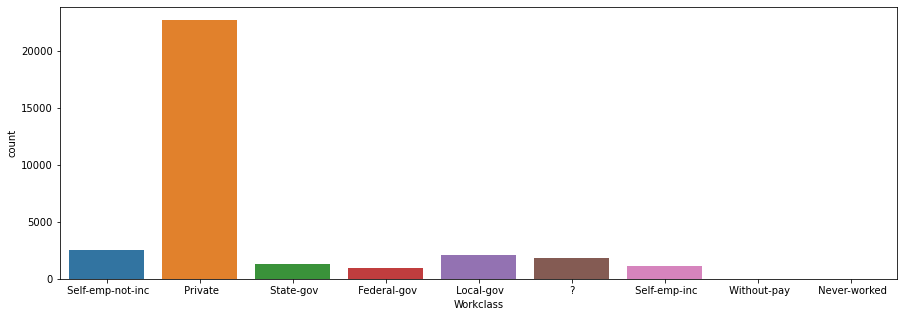

In [11]:
# Ploting the workclass column:
plt.figure(figsize=(15,5))
sns.countplot('Workclass',data=df)
plt.show()


- We can see that there are eight types of Worklass in which most of them are Private workers and there are few datas of 7 nos who never worked.
- we can see that there are 1836 values of workers whoose workclass is unknown and it is represented by '?'.we will merge this workers with the majority type "Private" while doing feature enigineering.

In [12]:
#counting the Age Variable

df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

- we can see that there are 16 types of Education background in this dataset.We will reduce the education background types by merging them into similar categories like School,highschool,Higher,grad,undergrad ,doc etc,while doing feature engineering.
- HS-grad education background is highest and Preschool is lowest.

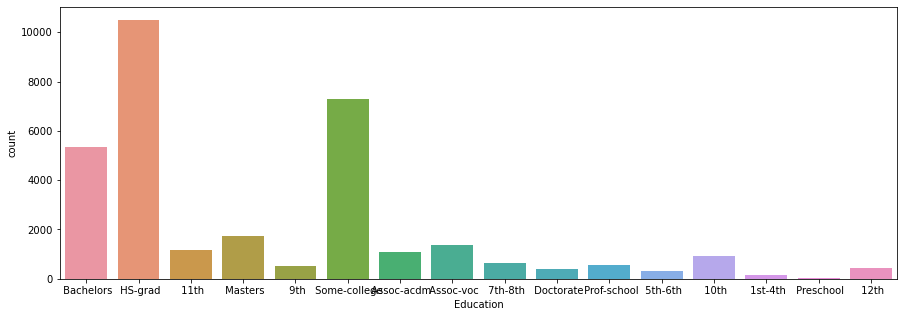

In [13]:
# Plotting the Education Column:
plt.figure(figsize=(15,5))
sns.countplot('Education',data=df)
plt.show()


- we can see that there are 16 types of Education background in this dataset.We will reduce the education background types by merging them into similar categories like School,highschool,Higher,grad,undergrad ,doc etc,while doing feature engineering.
- HS-grad education background is highest and Preschool is lowest.

In [14]:
#counting the Age Variable

df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

- we can see that there are 7 types of Marital_status in this dataset.We will reduce the Marital_status types by merging them into similar categories like Married,not married and others,while doing feature engineering.
- Married-civ-spouse is highest and Married-AF-spouse is lowest.

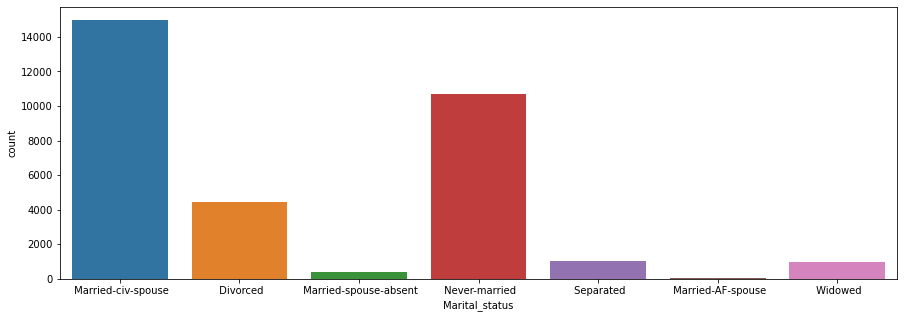

In [15]:
# Plotting the Marital_status column:
plt.figure(figsize=(15,5))
sns.countplot('Marital_status',data=df)
plt.show()


- we can see that there are 7 types of Marital_status in this dataset.We will reduce the Marital_status types by merging them into similar categories like Married,not married and others,while doing feature engineering.
- Married-civ-spouse is highest and Married-AF-spouse is lowest.

In [16]:
#counting the Age Variable

df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

- We can see that there are fourteen types of Occupations in which the highest no of people belongs to Prof-specialty occupation and the lowest no of people are in Armed Forces occupation.
- we can see that there are 1843 values of workers whoose occupation is unknown and it is represented by '?'.we will merge this workers with the majority type "Prof-specialty" while doing feature enigineering.

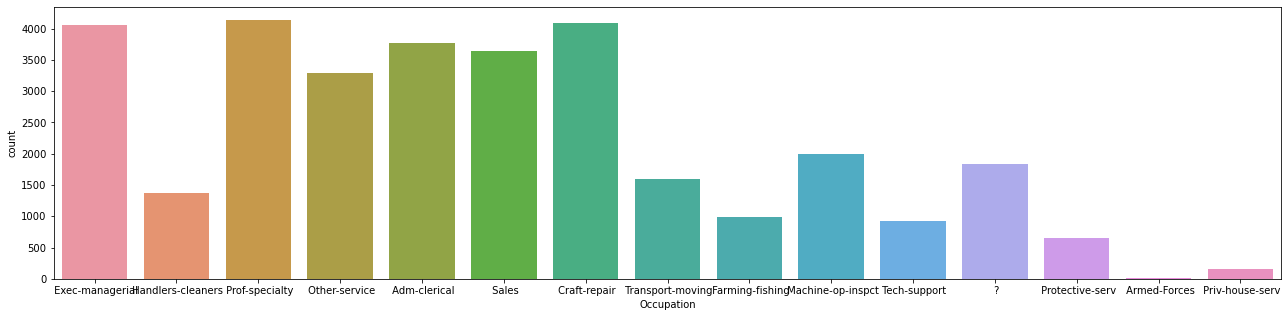

In [17]:
# Plotting occupation column:
plt.figure(figsize=(22,5))
sns.countplot('Occupation',data=df)
plt.show()

- We can see that there are fourteen types of Occupations in which the highest no of people belongs to Prof-specialty occupation and the lowest no of people are in Armed Forces occupation.
- we can see that there are 1843 values of workers whoose occupation is unknown and it is represented by '?'.we will merge this workers with the majority type "Prof-specialty" while doing feature enigineering.

In [18]:
#counting the Age Variable

df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

- There are six Relationship types in this dataset,most of them are Husbands and least is Other-relative.

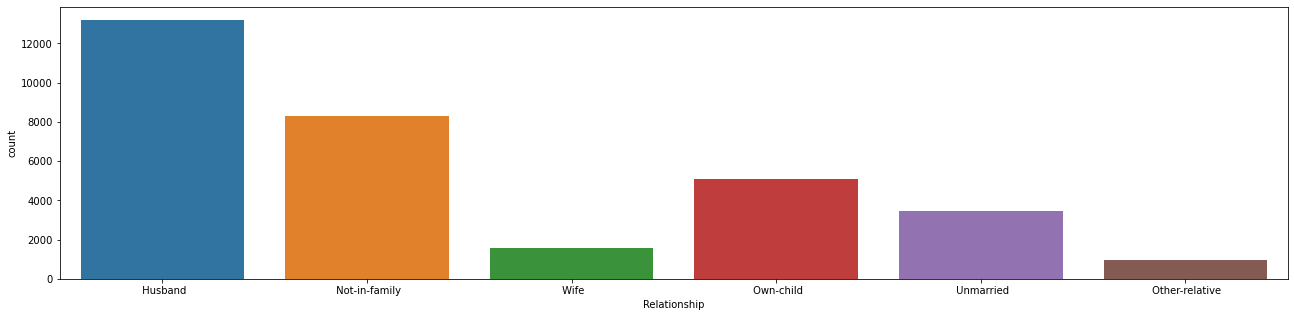

In [19]:
# Plotting the Relationship column:
plt.figure(figsize=(22,5))
sns.countplot('Relationship',data=df)
plt.show()

- There are six Relationship types in this dataset,most of them are Husbands and least is Other-relative.

In [20]:
#counting the Age Variable

df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

- There are five types of races found in this dataset .People belong to White Race is the highest and race type 'Other' is lowest.

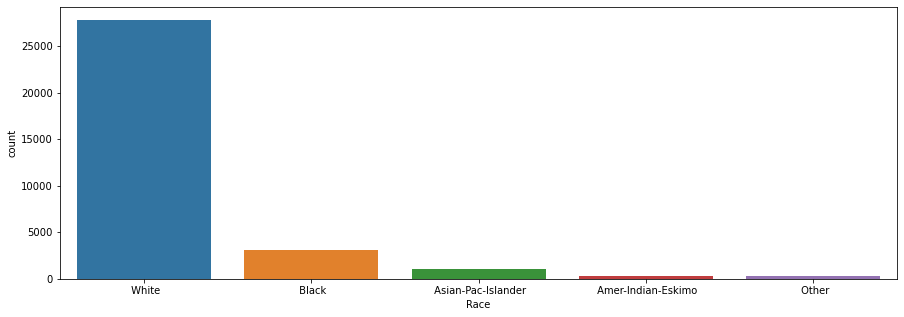

In [21]:
# Plotting the Race column:
plt.figure(figsize=(15,5))
sns.countplot('Race',data=df)
plt.show()


- There are five types of races found in this dataset .People belong to White Race is the highest and race type 'Other' is lowest.

In [22]:
#counting the Age Variable

df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

- Males are large in numbers than the females in this dataset.

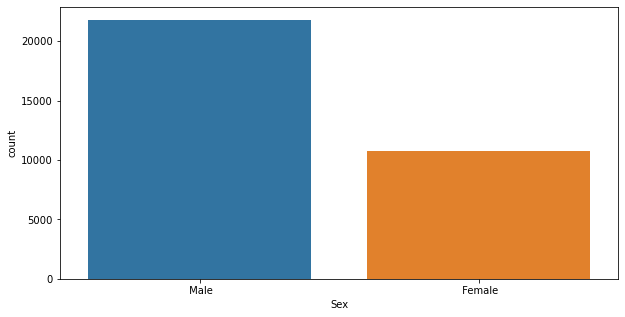

In [23]:
# Plotting the Sex column:
plt.figure(figsize=(10,5))
sns.countplot('Sex',data=df)
plt.show()

- Males are large in numbers than the females in this dataset.

In [24]:
#counting the Age Variable

df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

- This dataset contains the information of 41 countries.
- we can see that ,we have the highest information of people who stays is United states of America.
- we have only one information from the country Holand-Netherlands. 

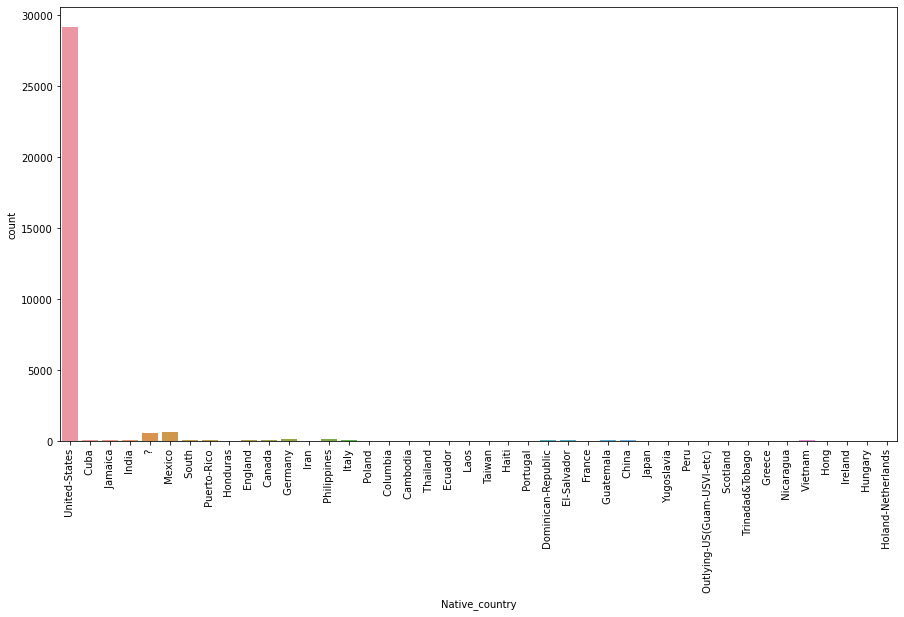

In [25]:
# Plotting the native country column:
plt.figure(figsize=(15,8))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

- This dataset contains the information of 41 countries.
- we can see that ,we have the highest information of people who stays is United states of America.
- we have only one information from the country Holand-Netherlands.

In [26]:
# Counting the income column:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

- The target varibale of this data is 'income' column,which have two type of values,which are <=50K and >50K.
- We can see from above counting that income(<=50K) have higher  values than income(>50K).

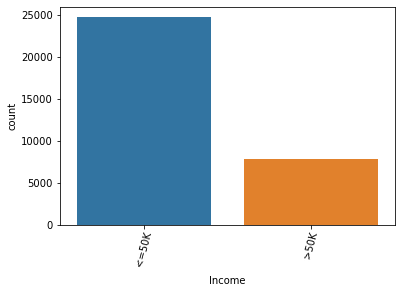

In [27]:
# Plotting the income column:
sns.countplot(df['Income'])
plt.xticks(rotation=75)
plt.show()

- The target varibale of this data is 'income' column,which have two type of values,which are <=50K and >50K.
- We can see from above counting that income(<=50K) have higher values than income(>50K).

In [28]:
# Plotting the continuous columns:

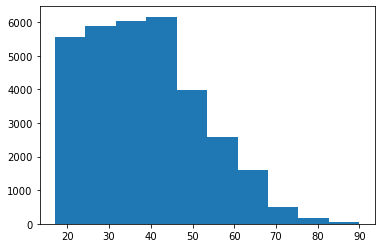

In [29]:
# Plotting the Age column:
plt.hist(df['Age'])
plt.show()

- Age range is between 17 to 90 years.
- Majority of the people ages between 25-40.

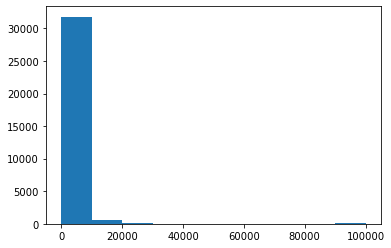

In [30]:
# Plotting the Capital gain column:
plt.hist(df['Capital_gain'])
plt.show()

- Capital gain is 0 for most of the people.

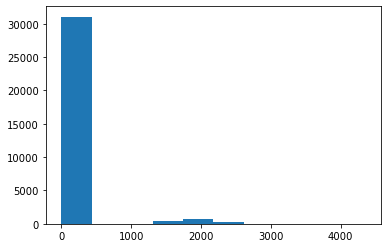

In [31]:
# Plotting the Capital_loss column:
plt.hist(df['Capital_loss'])
plt.show()

- Capital loss is also 0 for most of the people and we can see that there are some values near 2000.

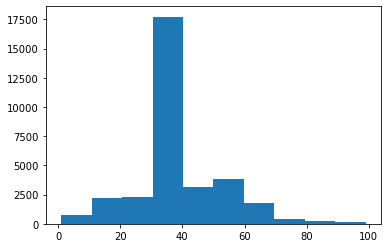

In [32]:
# Counting the Hours_per_week column:
plt.hist(df['Hours_per_week'])
plt.show()

- Most of the people works ,40 hours per week.

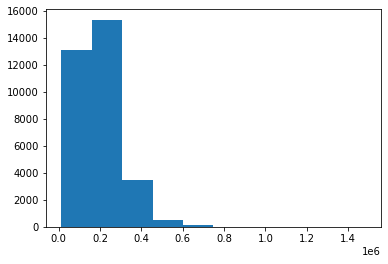

In [33]:
# Plotting the Fnlwgt column:
plt.hist(df['Fnlwgt'])
plt.show()

- Most Fnlwgt is 0.2 and lowest is 0.7.
- Fnlwgt varris from 0 to 0.8.

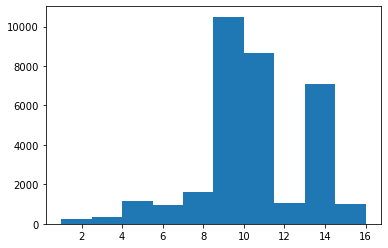

In [34]:
# Plotting Education Num column:
plt.hist(df['Education_num'])
plt.show()

- The Education_num having code 9 is highest in number.
- The Education_num havinf code 2 is highest in number.

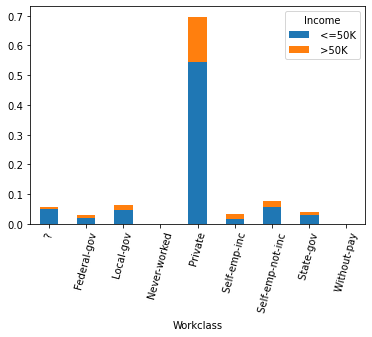

In [35]:
# Plotting Work class vs Income:
ct = pd.crosstab(df.Workclass, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Most of the people in all the workclass earns less than or equal to 50k. 
- People who are self employed have high chances of earning >50k.

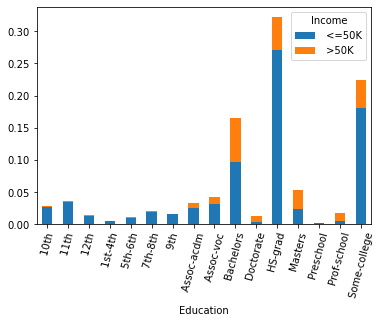

In [36]:
# Plotting Education vs Income column:
ct = pd.crosstab(df.Education, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Doctrorate and Prof School education has high chances of earning >50k income. 
- Lower educations  mostly earns <=50k.

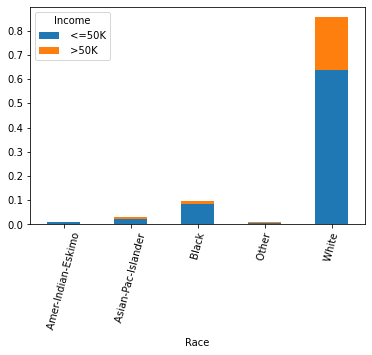

In [37]:
# Plotting Race vs Income column:
ct = pd.crosstab(df.Race, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- White people has more chance for earning more than 50k income.

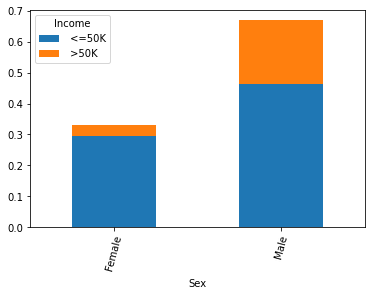

In [38]:
# Plotting Sex vs Income column:
ct = pd.crosstab(df.Sex, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Male population is more likely to earn >50k income.

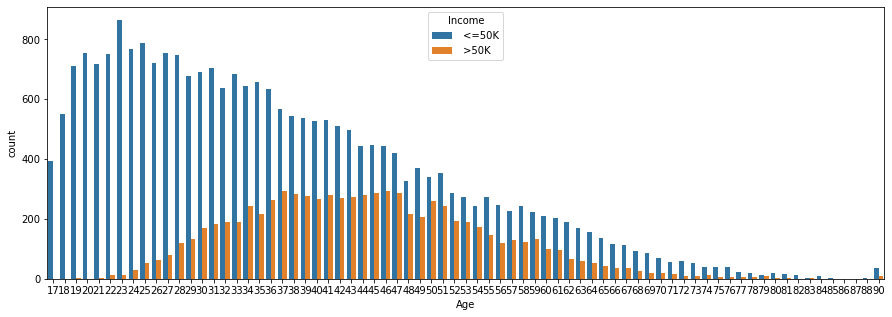

In [39]:
# Plotting Age vs Income
plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Income', data=df)
plt.show()

- We can see that the person falling in the age group between 37 - 47 have higher chances to income more than 50k.
- As the age increases the chance of earning more than 50k decreases.
- Lower the age ,lower is the chance of income more than 50K.
- We can observe that the median age for people earning more than $50k is significantly greater than the median age of people earning less than $50k. So, older people are more likely to earn more than $50k a year as compared to their younger counterparts.

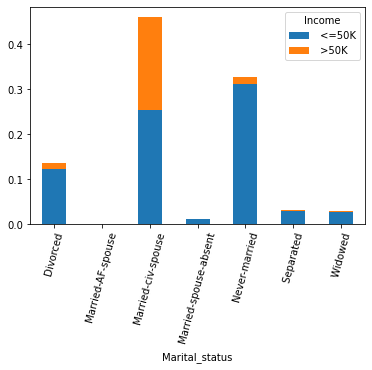

In [40]:
# Plotting Income Vs Martial Status:
ct = pd.crosstab(df.Marital_status, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Married civ Spouse is having the higher chances of earning more than 50K.
- Married Spouse Absent is having the least chances of earning the more than 50K.

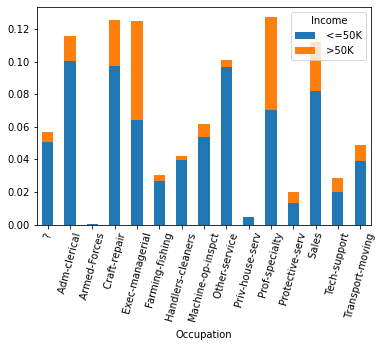

In [41]:
# Plotting income vs occupation column:
ct = pd.crosstab(df.Occupation, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- The people having Exec Manegerial and Prof Speciality occupation have the higher chances of earning more than 50k.
- Priv-house-serv is having the lowest chances to earn more than 50K.

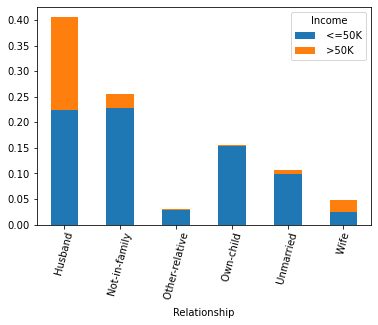

In [42]:
#Plotting Relationship vs Income column:
ct = pd.crosstab(df.Relationship, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- The relationship husband is having the higher chances to earn more than 50K.

In [43]:
df_features=df[['Age','Fnlwgt','Education_num',
'Capital_gain', 'Capital_loss', 'Hours_per_week']]   # Instantiating continuous variable into a single variable

- Instantiating continuous variable into a single variable.

# Checking outliers:

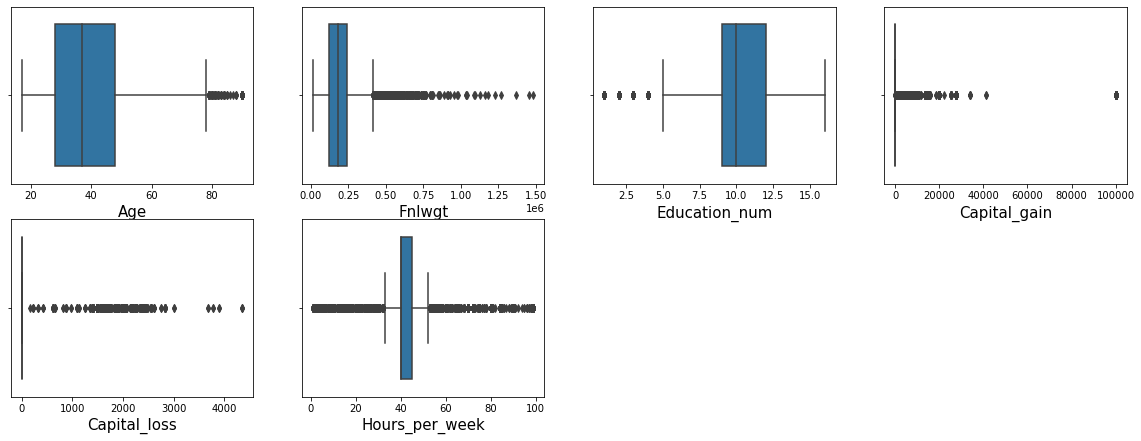

In [44]:
# checking outliers by using box plot:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- All the numerical data are having outliers that we need to take care.

# Checking Normal distribution:

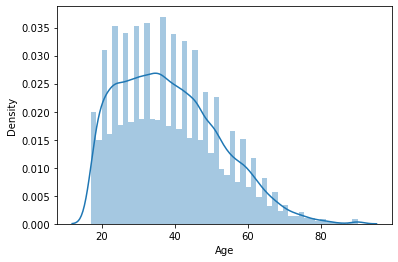

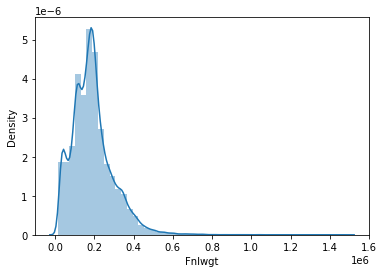

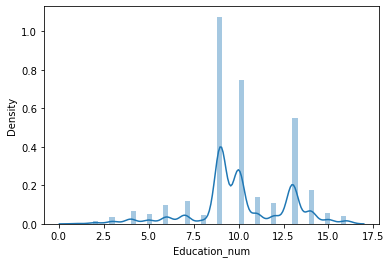

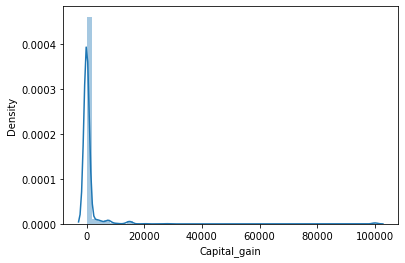

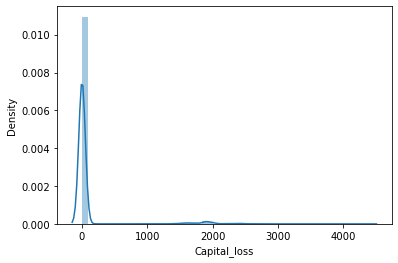

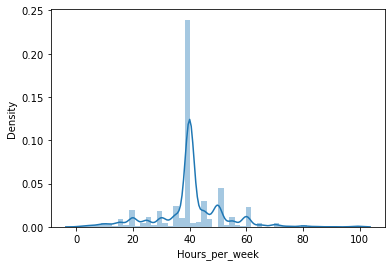

In [45]:
for i in df.columns:
    if df[i].dtypes==np.int64:
        sns.distplot(df[i])
        plt.show()

- Age is little right skewed as the difference of minimum working age and maximum working age is big. We need to take care of it.
- Capital_gain and Capital_loss is also very much right skewed.
- 40 is the mean hour per week , and the data is somewhat skewed.

<AxesSubplot:>

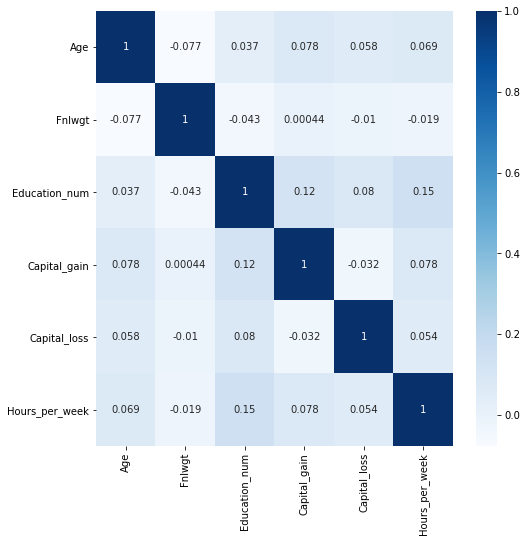

In [49]:
# Checking multi colinearity:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

- Least correlation between features important for Classification problem.
- Not a single feature is correlated with another feature.

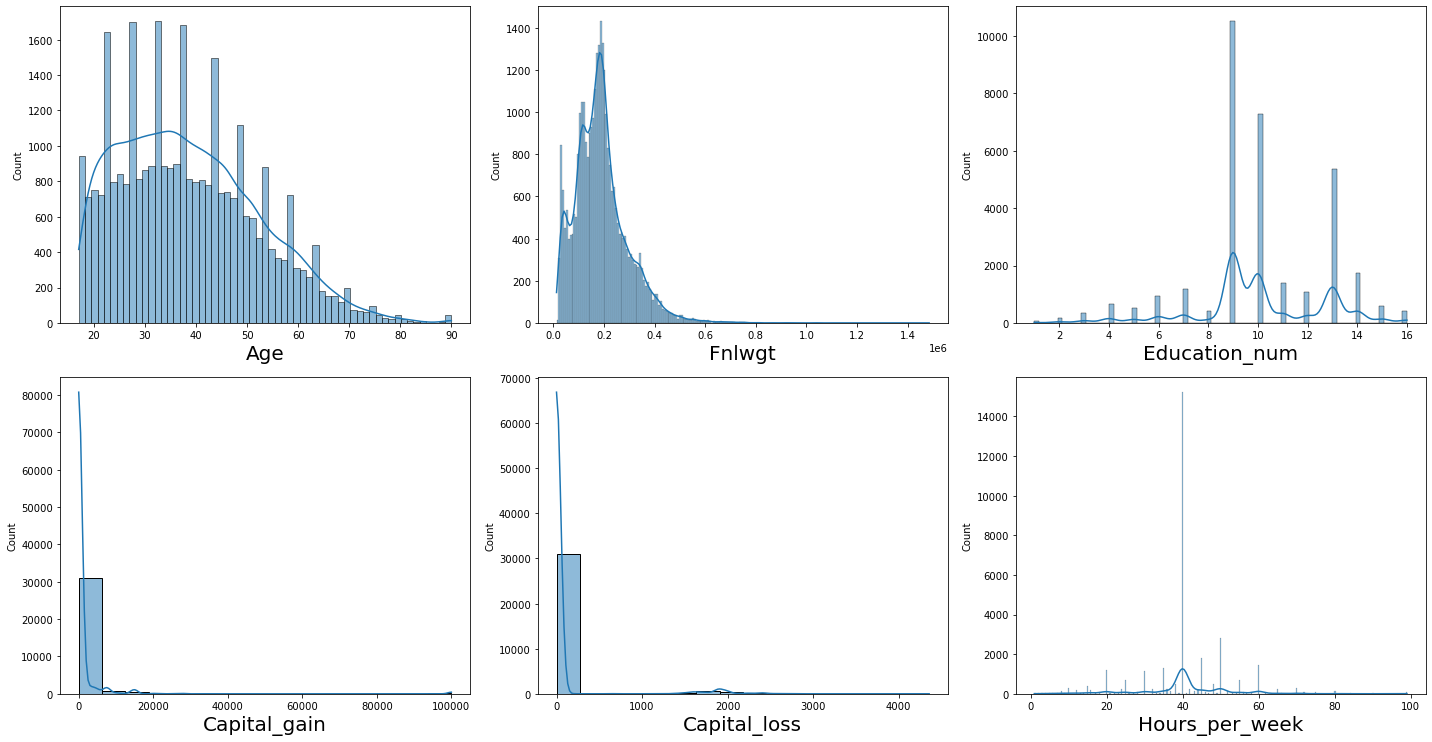

In [50]:
#checking normal distribution with histplot:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Age is little right skewed as the difference of minimum working age and maximum working age is big. We need to take care of it.
- Capital_gain and Capital_loss is also very much right skewed.
- 40 is the mean hour per week , and the data is somewhat skewed.

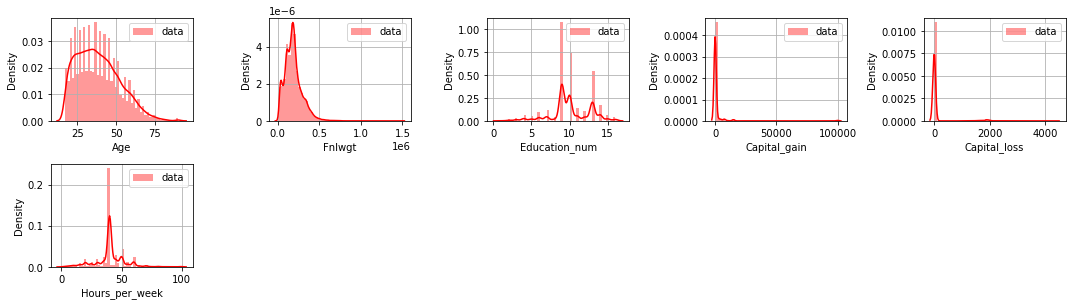

In [51]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- Age is little right skewed as the difference of minimum working age and maximum working age is big. We need to take care of it.
- Capital_gain and Capital_loss is also very much right skewed.
- 40 is the mean hour per week , and the data is somewhat skewed.

# Filling "?" values:

In [52]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private', regex=True) 

In [53]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- Merged the "?" workclass with the Private workclass.

In [54]:
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty', regex=True) 

In [55]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

- Merged the "?" occupation with the Prof-specialty occupation.

In [56]:
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States', regex=True) 

In [57]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

- Merged the "?" narive_country with the United-states Native country.

In [58]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


- As we can see there is no '?' value in workclass,occupation and Native_country columns.

# Feature Engineering:

In [59]:
df['Education'] = df['Education'].str.replace('Preschool', 'school', regex=True)
df['Education'] = df['Education'].str.replace('1st-4th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('5th-6th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('7th-8th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('9th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('10th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('11th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('12th', 'school', regex=True)


In [60]:
df['Education'] = df['Education'].str.replace('Hs-grad', 'high school', regex=True)

In [61]:
df['Education'] = df['Education'].str.replace('Assoc-voc', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Assoc-acdm', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Prof-school', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Some-college', 'higher', regex=True)

In [62]:
df['Education'] = df['Education'].str.replace('Bachelors', 'undergrad', regex=True)
df['Education'] = df['Education'].str.replace('Masters', 'grad', regex=True)
df['Education'] = df['Education'].str.replace('Doctorate', 'doc', regex=True)

In [63]:
df['Education'].value_counts()

 HS-grad      10501
 higher       10316
 undergrad     5354
 school        4253
 grad          1723
 doc            413
Name: Education, dtype: int64

- As we can see we have combined the 16 categories of Education column into 7 categories for simplify the data.

In [64]:
df['Marital_status'] = df['Marital_status'].str.replace('Married-civ-spouse', 'Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Married-AF-spouse', 'Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Never-married', 'not-Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Divorced', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Separated', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Widowed', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Married-spouse-absent', 'Others', regex=True)

In [65]:
df['Marital_status'].value_counts()

 Married        14999
 not-Married    10682
 Others          6879
Name: Marital_status, dtype: int64

- As we can see we have combined the 7 categories of Marital_status column into 3 categories for simplify the data.

In [66]:
# Label encode the Income column:
l = LabelEncoder()
l_s = ['Income']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [67]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,undergrad,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,undergrad,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,grad,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [68]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

- Label encoded the income column as 0 and 1.

In [69]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


- Least correlation between features important for Classification problem.
- Not a single feature is correlated with another feature.

In [70]:
#Encoding the categorical columns into numerical:
LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])



In [71]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,5,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,0,9,1,5,1,4,1,0,0,40,38,0
2,53,3,234721,4,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,5,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,2,14,0,3,5,4,0,0,0,40,38,0


- encoded all the categorical columns into numerical.

In [72]:
#Removing outliers by using Z-score: 
z_score = zscore(df[[
'Age','Fnlwgt','Education_num',
'Capital_gain', 'Capital_loss', 'Hours_per_week']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000
mean,38.143729,3.086365,185196.131626,2.394039,10.077882,0.887920,6.110906,1.479465,3.664901,0.660945,570.163443,1.209408,39.896101,36.474268,0.223086
std,13.357668,1.104230,94546.412036,1.861314,2.452841,0.879754,3.986790,1.609835,0.850599,0.473397,2332.556812,32.712102,11.139681,5.963267,0.416323
min,17.000000,0.000000,12285.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,27.000000,3.000000,117517.500000,0.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177669.000000,3.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234281.500000,4.000000,12.000000,2.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,7.000000,506329.000000,5.000000,16.000000,2.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


- We have applied z-score, now let's check the skewness before model creation:

In [73]:
df.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt             0.634168
Education         -0.165371
Education_num     -0.170298
Marital_status     0.219669
Occupation         0.005826
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.335169
Income             1.330372
dtype: float64

- There are skewness in the numerical columns. Let's remove those skewness.

- using power transformer method.

In [252]:
features = ['Fnlwgt','Sex','Capital_gain','Capital_loss','Native_country']

In [253]:
scaler=PowerTransformer(method='yeo-johnson')

In [254]:
df[features]=scaler.fit_transform(df[features].values)

In [255]:
df[features]

,Fnlwgt,Sex,Capital_gain,Capital_loss,Native_country
0,-1.113967,0.716230,-0.296683,-0.040148,0.287586
1,0.425203,0.716230,-0.296683,-0.040148,0.287586
2,0.605108,0.716230,-0.296683,-0.040148,0.287586
3,1.484491,-1.396199,-0.296683,-0.040148,-3.477718
4,1.046225,-1.396199,-0.296683,-0.040148,0.287586
...,...,...,...,...,...
32555,0.809685,-1.396199,-0.296683,-0.040148,0.287586
32556,-0.208537,0.716230,-0.296683,-0.040148,0.287586
32557,-0.236227,-1.396199,-0.296683,-0.040148,0.287586
32558,0.286963,0.716230,-0.296683,-0.040148,0.287586


In [256]:
df.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt            -0.034910
Education         -0.165371
Education_num     -0.170298
Marital_status     0.219669
Occupation         0.005826
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Native_country    -3.046698
Income             1.330372
dtype: float64

- Still there is huge skewness in Capital loss and Capital gain.we will delete this colums latte because this two contains mostly 0 values.

In [74]:
# Dropping the unwanted column:
df.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,5,13,0,3,0,4,1,13,38,0
1,38,3,215646,0,9,1,5,1,4,1,40,38,0
2,53,3,234721,4,7,0,5,0,2,1,40,38,0
3,28,3,338409,5,13,0,9,5,2,0,40,4,0
4,37,3,284582,2,14,0,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,3,12,0,12,5,4,0,38,38,0
32556,40,3,154374,0,9,0,6,0,4,1,40,38,1
32557,58,3,151910,0,9,1,0,4,4,0,40,38,0
32558,22,3,201490,0,9,2,0,3,4,1,20,38,0


- Dropped the Capital_gain and Capital_loss column.

In [75]:
# dividing the dataset into features and target.
x = df.drop(columns=['Income'], axis=1)
y = df['Income']
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,83311,5,13,0,3,0,4,1,13,38
1,38,3,215646,0,9,1,5,1,4,1,40,38
2,53,3,234721,4,7,0,5,0,2,1,40,38
3,28,3,338409,5,13,0,9,5,2,0,40,4
4,37,3,284582,2,14,0,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,3,12,0,12,5,4,0,38,38
32556,40,3,154374,0,9,0,6,0,4,1,40,38
32557,58,3,151910,0,9,1,0,4,4,0,40,38
32558,22,3,201490,0,9,2,0,3,4,1,20,38


In [76]:
# counting the Income class for balancing it with smote:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

- We can see that there is huge differnce between the two class.we  will balance the two class before initiating into the model by using smote.

In [260]:
# Balancing both the classes with SMOTE:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [261]:
y.value_counts()

1    23173
0    23173
Name: Income, dtype: int64

- Now both the classes is balanced.

# Standardization:

In [262]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# VIF:

In [263]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.307455,Age
1,1.005686,Workclass
2,1.011117,Fnlwgt
3,1.126540,Education
4,1.189404,Education_num
5,1.552559,Marital_status
6,1.014860,Occupation
7,2.074507,Relationship
8,1.070196,Race
9,1.899326,Sex


# Hold out method:

In [264]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=41)

# Creating Model:

# 1.Logistic Regression:

In [265]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:81.40%
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.861743      0.776777  0.813976      0.819260      0.819496
recall         0.750401      0.878262  0.813976      0.814331      0.813976
f1-score       0.802227      0.824408  0.813976      0.813317      0.813256
support    17476.000000  17283.000000  0.813976  34759.000000  34759.000000
 Confusion Matrix:
[[13114  4362]
 [ 2104 15179]]



In [266]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:82.20%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.863282     0.790705  0.822042      0.826993      0.826389
recall        0.758118     0.883871  0.822042      0.820995      0.822042
f1-score      0.807290     0.834696  0.822042      0.820993      0.821221
support    5697.000000  5890.000000  0.822042  11587.000000  11587.000000
 Confusion Matrix:
[[4319 1378]
 [ 684 5206]]



In [267]:
roc_auc_score(y_test,lr.predict(x_test))

0.8209946378116383

# 2.Decision Tree Classifier:

In [268]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999943      1.000000  0.999971      0.999971      0.999971
recall         1.000000      0.999942  0.999971      0.999971      0.999971
f1-score       0.999971      0.999971  0.999971      0.999971      0.999971
support    17476.000000  17283.000000  0.999971  34759.000000  34759.000000
 Confusion Matrix:
[[17476     0]
 [    1 17282]]



In [269]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:82.26%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.823446     0.821890  0.822646      0.822668      0.822655
recall        0.813762     0.831239  0.822646      0.822501      0.822646
f1-score      0.818575     0.826538  0.822646      0.822557      0.822623
support    5697.000000  5890.000000  0.822646  11587.000000  11587.000000
 Confusion Matrix:
[[4636 1061]
 [ 994 4896]]



In [270]:
roc_auc_score(y_test,dt.predict(x_test))

0.8225005088610363

# Random Forrest classifier: 

In [271]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:99.99%
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.999884  0.999942      0.999942      0.999942
recall         0.999886      1.000000  0.999942      0.999943      0.999942
f1-score       0.999943      0.999942  0.999942      0.999942      0.999942
support    17476.000000  17283.000000  0.999942  34759.000000  34759.000000
 Confusion Matrix:
[[17474     2]
 [    0 17283]]



In [272]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")


Accuracy score:88.19%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.896501     0.868962  0.881937      0.882732      0.882502
recall        0.859049     0.904075  0.881937      0.881562      0.881937
f1-score      0.877375     0.886171  0.881937      0.881773      0.881846
support    5697.000000  5890.000000  0.881937  11587.000000  11587.000000
 Confusion Matrix:
[[4894  803]
 [ 565 5325]]



In [273]:
roc_auc_score(y_test,rf.predict(x_test))

0.8815616624840227

# 4.KNeighbors Classifier:

In [274]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:88.87%
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.929658      0.854508  0.888748      0.892083      0.892292
recall         0.842470      0.935544  0.888748      0.889007      0.888748
f1-score       0.883919      0.893192  0.888748      0.888555      0.888530
support    17476.000000  17283.000000  0.888748  34759.000000  34759.000000
 Confusion Matrix:
[[14723  2753]
 [ 1114 16169]]



In [275]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:84.63%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.878138     0.820565  0.846293      0.849352      0.848872
recall        0.798139     0.892869  0.846293      0.845504      0.846293
f1-score      0.836230     0.855191  0.846293      0.845711      0.845869
support    5697.000000  5890.000000  0.846293  11587.000000  11587.000000
 Confusion Matrix:
[[4547 1150]
 [ 631 5259]]



In [276]:
roc_auc_score(y_test,kn.predict(x_test))

0.8455043207740767

# 5.Support Vector Clasifier:

In [277]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:84.26%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.863282     0.790705  0.822042      0.826993      0.826389
recall        0.758118     0.883871  0.822042      0.820995      0.822042
f1-score      0.807290     0.834696  0.822042      0.820993      0.821221
support    5697.000000  5890.000000  0.822042  11587.000000  11587.000000
 Confusion Matrix:
[[13614  3862]
 [ 1609 15674]]



In [278]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:84.79%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.890145     0.815403  0.847933      0.852774      0.852152
recall        0.787959     0.905942  0.847933      0.846950      0.847933
f1-score      0.835940     0.858292  0.847933      0.847116      0.847302
support    5697.000000  5890.000000  0.847933  11587.000000  11587.000000
 Confusion Matrix:
[[4489 1208]
 [ 554 5336]]



In [279]:
roc_auc_score(y_test,svc.predict(x_test))

0.8469504248654387

# 6.Gradient Boost Classifier:

In [280]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_train)
gbc_clf_report = pd.DataFrame(classification_report(y_train,gbc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,gbc_pred)}\n")

Accuracy score:84.71%
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.882975      0.816916   0.84709      0.849945      0.850129
recall         0.802186      0.892496   0.84709      0.847341      0.847090
f1-score       0.840644      0.853035   0.84709      0.846839      0.846805
support    17476.000000  17283.000000   0.84709  34759.000000  34759.000000
 Confusion Matrix:
[[14019  3457]
 [ 1858 15425]]



In [281]:
gbc_pred=gbc.predict(x_test)
gbc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,gbc_pred)}\n")

Accuracy score:85.43%
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.890145     0.815403  0.847933      0.852774      0.852152
recall        0.787959     0.905942  0.847933      0.846950      0.847933
f1-score      0.835940     0.858292  0.847933      0.847116      0.847302
support    5697.000000  5890.000000  0.847933  11587.000000  11587.000000
 Confusion Matrix:
[[4635 1062]
 [ 626 5264]]



In [282]:
roc_auc_score(y_test,gbc.predict(x_test))

0.8536521321649944

# CROSS VALIDATION SCORE:

In [283]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:81.33%


In [284]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:83.05%


In [285]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:88.07%


In [286]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:83.93%


In [287]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:81.52%


In [288]:
print(f"CV Score of SVC:{cross_val_score(gbc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:84.35%


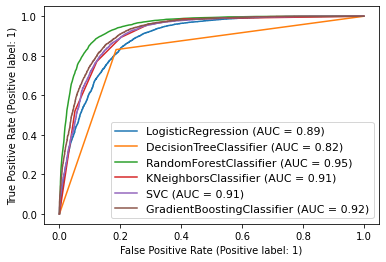

In [293]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- Choosing Random forrest as the best model because the accuracy score and the cross validation score is least in this model,which is 88.19-88.7=0.8.

# HYPER PARAMETER TUNING OF RANDOM FORREST MODEL:

In [290]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [291]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [292]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [294]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 21}


In [295]:
rf = RandomForestClassifier(criterion= 'gini',max_depth=35,min_samples_leaf = 5, min_samples_split=10,n_estimators =21)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8682143781824458

- After using Hyper Parameter tuning we got the score of approx 87%.

In [216]:
# model prediction using DT
x_predict = list(rf.predict(x_test))
rf_census = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_census))

       predicted_values  orignal_values
14958                 0               0
7013                  0               1
41678                 1               1
27713                 0               0
22551                 0               1
...                 ...             ...
2720                  0               0
7650                  1               0
22342                 0               0
2733                  0               0
11908                 0               0

[11587 rows x 2 columns]


In [217]:
#import joblib
import joblib

joblib.dump(dt,'rf_census_file.obj')

# SAVING THE MODEL

['rf_census_file.obj']

In [218]:
rf_census_joblib=joblib.load('rf_census_file.obj')
rf_census_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 0, 1, ..., 0, 0, 0])

# CONCLUSION:

- In this project, I employ several supervised algorithms to accurately predict an individual income using data collected from the 1994 U.S. Census.We implement various testing procecures to choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.The primary goal of this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can infer this value from other publically available features.
- We set up a process with many steps in order to achieve good accuracy and efficient results.We explored and understood the dataset by exploratory data analysis with the help of histograms, graphs of features against class and more. This helped us understand how the dataset was distributed and if there was any bias in the dataset that we would have to handle before training models. We also plotted the label data and realised the class label was highly unbalanced, and fixed it with Smote Analysis.Further, With the help of various preprocessing techniques, such as Handling missing, Outlier detection, feature selection, categorial to numeric transformation,and data sampling, we attempted our best to clean and transform data to improve data efficiency. After cleaning and preprocessing the data, we trained various models on the dataset.
We trained 6 models i.e,, Logistic Regression, Decision Tree, Random Forest Classifier, Bagging K-Neighbors Classifier, AdaBoost Classifier and Support vector Classifier. Most of the models gave an accuracy of around 85%. Although Random Forrest Classifier gave us the highest accuracy, Decision Tree predicted the best based on its sensitivity. Decision Tree also shows a great balance between the specificity and sensitivity.